<a href="https://colab.research.google.com/github/Eucharista16/DataScience-In-Python/blob/main/Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generated Sensor Data:


,temperature,humidity,timestamp
0,37.04,70.88,2022-01-01 00:00:00
1,37.46,67.44,2022-01-01 00:01:00
2,36.99,79.87,2022-01-01 00:02:00
3,36.63,77.68,2022-01-01 00:03:00
4,36.11,60.82,2022-01-01 00:04:00


Data with Anomaly Detection:


,temperature,humidity,timestamp,anomaly
0,37.04,70.88,2022-01-01 00:00:00,Normal
1,37.46,67.44,2022-01-01 00:01:00,Normal
2,36.99,79.87,2022-01-01 00:02:00,Anomaly
3,36.63,77.68,2022-01-01 00:03:00,Normal
4,36.11,60.82,2022-01-01 00:04:00,Anomaly
5,36.33,69.69,2022-01-01 00:05:00,Normal
6,38.18,79.08,2022-01-01 00:06:00,Anomaly
7,38.00,68.08,2022-01-01 00:07:00,Normal
8,38.97,66.24,2022-01-01 00:08:00,Normal
9,38.93,65.28,2022-01-01 00:09:00,Normal


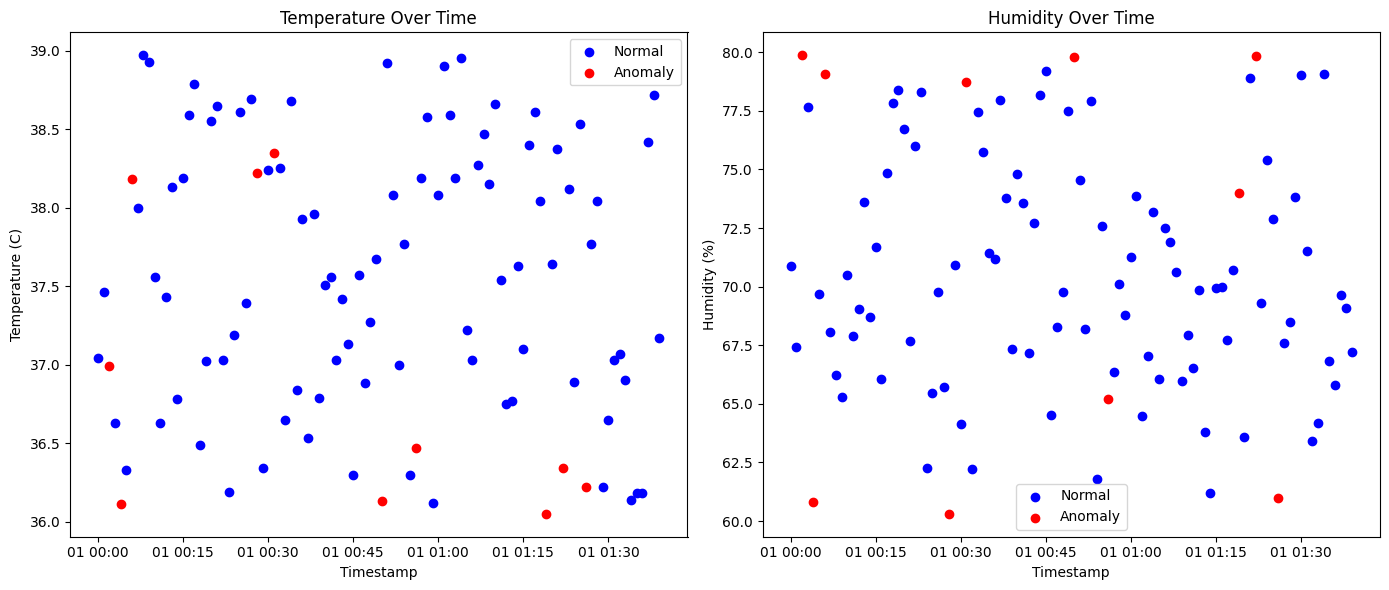

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import random
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import time

# Simulate sensor data
def generate_sensor_data(num_samples=100):
    data = {
        'temperature': [round(random.uniform(36.0, 39.0), 2) for _ in range(num_samples)],
        'humidity': [round(random.uniform(60.0, 80.0), 2) for _ in range(num_samples)],
        'timestamp': pd.date_range(start='1/1/2022', periods=num_samples, freq='T').tolist()
    }
    return pd.DataFrame(data)

# Generate data
data = generate_sensor_data()

# Display the first few rows of the generated data
print("Generated Sensor Data:")
display(data.head())

# Train Isolation Forest model
def train_model(data):
    model = IsolationForest(contamination=0.1)
    model.fit(data[['temperature', 'humidity']])
    return model

model = train_model(data)

# Predict anomalies
def detect_anomalies(model, data):
    data['anomaly'] = model.predict(data[['temperature', 'humidity']])
    data['anomaly'] = data['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
    return data

data = detect_anomalies(model, data)

# Display the results
print("Data with Anomaly Detection:")
display(data.head(10))

# Plot the data
def plot_data(data):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    normal_data = data[data['anomaly'] == 'Normal']
    anomaly_data = data[data['anomaly'] == 'Anomaly']

    ax[0].scatter(normal_data['timestamp'], normal_data['temperature'], c='blue', label='Normal')
    ax[0].scatter(anomaly_data['timestamp'], anomaly_data['temperature'], c='red', label='Anomaly')
    ax[0].set_title('Temperature Over Time')
    ax[0].set_xlabel('Timestamp')
    ax[0].set_ylabel('Temperature (C)')
    ax[0].legend()

    ax[1].scatter(normal_data['timestamp'], normal_data['humidity'], c='blue', label='Normal')
    ax[1].scatter(anomaly_data['timestamp'], anomaly_data['humidity'], c='red', label='Anomaly')
    ax[1].set_title('Humidity Over Time')
    ax[1].set_xlabel('Timestamp')
    ax[1].set_ylabel('Humidity (%)')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

plot_data(data)


In [ ]:
!pip install streamlit pandas scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00


2024-07-30 10:08:01.456 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


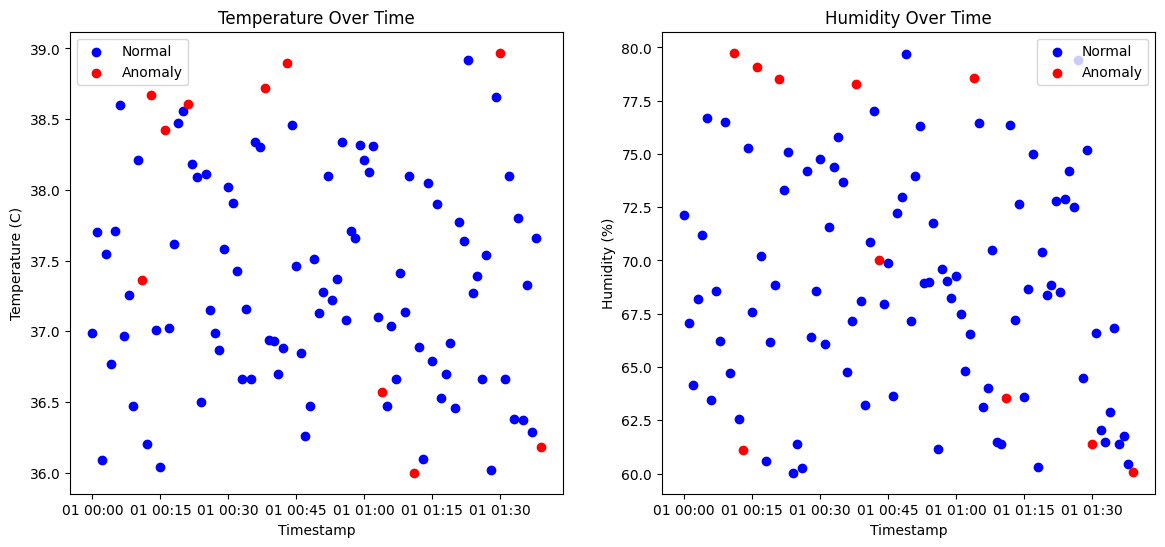

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import random
import matplotlib.pyplot as plt

# Function to simulate sensor data
def generate_sensor_data(num_samples=100):
    data = {
        'temperature': [round(random.uniform(36.0, 39.0), 2) for _ in range(num_samples)],
        'humidity': [round(random.uniform(60.0, 80.0), 2) for _ in range(num_samples)],
        'timestamp': pd.date_range(start='1/1/2022', periods=num_samples, freq='T').tolist()
    }
    return pd.DataFrame(data)

# Generate data
data = generate_sensor_data()

# Function to train Isolation Forest model
def train_model(data):
    model = IsolationForest(contamination=0.1)
    model.fit(data[['temperature', 'humidity']])
    return model

model = train_model(data)

# Function to detect anomalies
def detect_anomalies(model, data):
    data['anomaly'] = model.predict(data[['temperature', 'humidity']])
    data['anomaly'] = data['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
    return data

data = detect_anomalies(model, data)

# Streamlit app
st.title("Smart Livestock Health Monitoring System")

st.write("## Generated Sensor Data")
st.write(data.head())

# Plot the data
st.write("## Data Plot")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
normal_data = data[data['anomaly'] == 'Normal']
anomaly_data = data[data['anomaly'] == 'Anomaly']

ax[0].scatter(normal_data['timestamp'], normal_data['temperature'], c='blue', label='Normal')
ax[0].scatter(anomaly_data['timestamp'], anomaly_data['temperature'], c='red', label='Anomaly')
ax[0].set_title('Temperature Over Time')
ax[0].set_xlabel('Timestamp')
ax[0].set_ylabel('Temperature (C)')
ax[0].legend()

ax[1].scatter(normal_data['timestamp'], normal_data['humidity'], c='blue', label='Normal')
ax[1].scatter(anomaly_data['timestamp'], anomaly_data['humidity'], c='red', label='Anomaly')
ax[1].set_title('Humidity Over Time')
ax[1].set_xlabel('Timestamp')
ax[1].set_ylabel('Humidity (%)')
ax[1].legend()

st.pyplot(fig)

st.write("## Data with Anomaly Detection")
st.write(data.head(10))
